# Bibliotecas

In [1]:
from madeiras import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from UQpy.distributions import Normal
from UQpy.reliability import FORM
from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel

c:\reliabridge\myenv\Lib\site-packages\UQpy\__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Execução da otimização

### Dados do projeto

In [2]:
df = pd.read_excel("beam_data.xlsx")
df = df.to_dict(orient="records")
df = df[0] 
df

{'l (cm)': 500,
 'b_wpista (cm)': 900,
 'tipo_secao_longarina': 'Circular',
 'tipo_secao_tabuleiro': 'Retangular',
 'p_gk (kPa)': 5.7743,
 'p_rodak (kN)': 40,
 'p_qk (kPa)': 4,
 'a (m)': 1.5,
 'classe_carregamento': 'permanente',
 'classe_madeira': 'madeira natural',
 'classe_umidade': 1,
 'gamma_g': 1.35,
 'gamma_q': 1.5,
 'gamma_w': 1.4,
 'psi_2': 0.3,
 'phi': 0.8,
 'densidade longarina (kg/m³)': 560,
 'resistência característica à flexão longarina (MPa)': 50,
 'resistência característica ao cisalhamento longarina (MPa)': 4,
 'módulo de elasticidade à flexão longarina (GPa)': 14,
 'densidade tabuleiro (kg/m³)': 560,
 'resistência característica à flexão tabuleiro (MPa)': 40}

### Dados dos intervalos das vars de projeto

In [3]:
ds = [30, 150]
esps = [30, 200]
bws = [12, 60]
hs = [12, 60]

### Chamando o NSGA-II

In [4]:
res_nsga = chamando_nsga2(df, ds, esps, bws, hs)
res_nsga

,d [cm],esp [cm],bw [cm],h [cm],area [m²],delta [-],flex lim beam [(Ms-Mr)/Mr],cis lim beam [(Vs-Vr)/Vr],delta lim beam [(ps-pr)/pr],flex lim deck [(Ms-Mr)/Mr]
0,71.295272,30.319666,12.000000,12.000000,0.413619,0.024533,-0.753512,-0.000179,-0.912282,-1.392470
1,84.558522,200.000000,12.000000,55.385731,0.628034,0.031595,-0.797281,-0.000030,-0.955670,-0.714119
2,83.491447,197.917859,12.000000,44.552124,0.600950,0.031488,-0.794366,-0.000579,-0.953360,-0.564886
3,82.944672,199.959425,12.000000,37.063403,0.584816,0.031458,-0.792712,-0.000007,-0.952118,-0.363503
4,84.126973,198.156252,12.000001,51.908168,0.618143,0.031571,-0.796074,-0.000002,-0.954753,-0.678617
...,...,...,...,...,...,...,...,...,...,...
495,72.512746,51.347698,12.000007,12.114850,0.427508,0.025993,-0.758191,-0.000103,-0.918027,-0.754282
496,76.507650,114.476870,12.000000,19.954067,0.483671,0.029296,-0.772564,-0.000227,-0.933853,-0.022844
497,76.522001,114.724791,12.000002,20.035213,0.483941,0.029314,-0.772588,-0.000081,-0.933903,-0.027266
498,73.383715,66.593631,12.000000,12.000001,0.437350,0.026888,-0.761460,-0.000143,-0.921850,-0.160027


### Tabela de resultados da fronteira

In [5]:
print(      
            res_nsga.to_latex(
            column_format=''.join(['c' for _ in range(len(res_nsga.columns) + 1)]),
            float_format="%.3f",
            escape=False,
            caption='Tensões para diferentes combinações de carga',
            label='tab:tensoes_completas',
            position='htbp'
            )
    )

\begin{table}[htbp]
\caption{Tensões para diferentes combinações de carga}
\label{tab:tensoes_completas}
\begin{tabular}{ccccccccccc}
\toprule
 & d [cm] & esp [cm] & bw [cm] & h [cm] & area [m²] & delta [-] & flex lim beam [(Ms-Mr)/Mr] & cis lim beam [(Vs-Vr)/Vr] & delta lim beam [(ps-pr)/pr] & flex lim deck [(Ms-Mr)/Mr] \\
\midrule
0 & 71.295 & 30.320 & 12.000 & 12.000 & 0.414 & 0.025 & -0.754 & -0.000 & -0.912 & -1.392 \\
1 & 84.559 & 200.000 & 12.000 & 55.386 & 0.628 & 0.032 & -0.797 & -0.000 & -0.956 & -0.714 \\
2 & 83.491 & 197.918 & 12.000 & 44.552 & 0.601 & 0.031 & -0.794 & -0.001 & -0.953 & -0.565 \\
3 & 82.945 & 199.959 & 12.000 & 37.063 & 0.585 & 0.031 & -0.793 & -0.000 & -0.952 & -0.364 \\
4 & 84.127 & 198.156 & 12.000 & 51.908 & 0.618 & 0.032 & -0.796 & -0.000 & -0.955 & -0.679 \\
5 & 84.509 & 199.989 & 12.000 & 54.819 & 0.627 & 0.032 & -0.797 & -0.000 & -0.956 & -0.708 \\
6 & 81.204 & 183.636 & 12.000 & 28.412 & 0.552 & 0.031 & -0.788 & -0.000 & -0.948 & -0.033 \\
7 & 84.1

### Visualização da fronteira

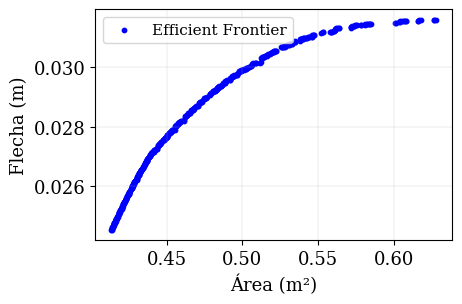

In [ ]:
import matplotlib.pyplot as plt

dpi = 600
name = 'efficient_frontier'
b_cm = 12
h_cm = 8
inches_to_cm = 1 / 2.54
b_input = b_cm * inches_to_cm
h_input = h_cm * inches_to_cm
label_x = r"Área (m²)"
label_y = r"Flecha (m)"
size_label = 13
size_axis = 13
color_label = 'black'
color_axis = 'black'
marker_style = 'o'
size_marker = 10
color_point = 'blue'
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(b_input, h_input))
ax.tick_params(axis='both', which='major',
               labelsize=size_axis,
               colors=color_axis)
ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
ax.set_ylabel(label_y, fontsize=size_label, color=color_label)
ax.grid(True, which='both', linestyle='-', linewidth=0.3, alpha=0.6)
ax.scatter(
    res_nsga["area [m²]"],
    res_nsga["delta [-]"],
    color=color_point,
    s=size_marker,
    label="Efficient Frontier"
)
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
fig.savefig(f"{name}.png", dpi=dpi, bbox_inches='tight')
plt.show()

# Teste da função objetivo isolada

In [9]:
df = pd.read_excel("beam_data.xlsx")
df = df.to_dict(orient="records")
df = df[0] 
problem = ProjetoOtimo(
                        l=df["l (cm)"],
                        p_gk=df["p_gk (kPa)"],
                        p_rodak=df["p_rodak (kN)"],
                        p_qk=df["p_qk (kPa)"],
                        a=df["a (m)"],
                        classe_carregamento=df["classe_carregamento"],
                        classe_madeira=df["classe_madeira"],
                        classe_umidade=df["classe_umidade"],
                        gamma_g=df["gamma_g"],
                        gamma_q=df["gamma_q"],
                        gamma_w=df["gamma_w"],
                        psi2=df["psi_2"],
                        phi=df["phi"],
                        densidade_long=df["densidade longarina (kg/m³)"],
                        densidade_tab=df["densidade tabuleiro (kg/m³)"],
                        f_mk_long=df["resistência característica à flexão longarina (MPa)"],
                        f_vk_long=df["resistência característica ao cisalhamento longarina (MPa)"],
                        e_modflex_long=df["módulo de elasticidade à flexão longarina (GPa)"],
                        f_mk_tab=df["resistência característica à flexão tabuleiro (MPa)"],
                        d_min=ds[0],
                        d_max=ds[1],
                        esp_min=esps[0],
                        esp_max=esps[1],
                        bw_min=bws[0],
                        bw_max=bws[1],
                        h_min=hs[0],
                        h_max=hs[1],
                    )

# 2) Define uma solução manual
x_manual = np.array([[34., 120.0, 10., 30.]])   # d, esp, bw, h

# 3) Avalia
out = problem.evaluate(x_manual, return_values_of=["F", "G"])

# 4) Imprime resultados
f = out[0]
g = out[1]
print(f, g)

[[ 0.12079203 -0.70747326]] [[ 1.54116212  5.45653308  0.6959555  -0.4406421 ]]


# Monte Carlo

Total amostras: 25000
Viáveis: 14470


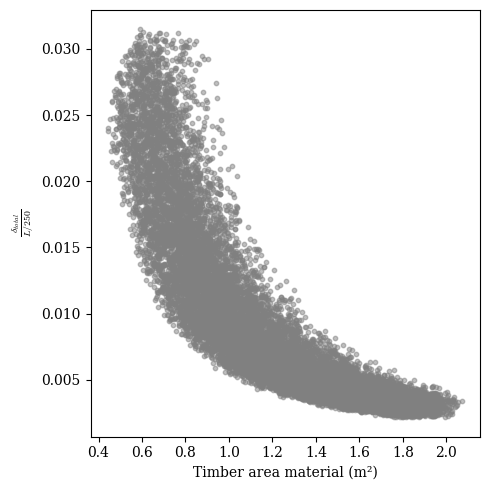

In [10]:
N = 25000
rng = np.random.default_rng(123)

# amostra uniformemente no intervalo do problema
d_mc = rng.uniform(problem.xl[0], problem.xu[0], size=N)
X_mc = d_mc.reshape(-1, 1)   # shape (N,1)
esp_mc = rng.uniform(problem.xl[1], problem.xu[1], size=N)
bw_mc = rng.uniform(problem.xl[2], problem.xu[2], size=N)
h_mc = rng.uniform(problem.xl[3], problem.xu[3], size=N)
X_mc = np.column_stack((d_mc, esp_mc, bw_mc,  h_mc))  # shape (N,4)

# avalia em lote
out = problem.evaluate(X_mc, return_values_of=["F", "G"])
F = np.asarray(out[0])   # shape (N,2)
G = np.asarray(out[1])   # shape (N,4)

# filtro de viabilidade: todas restrições <= 0
mask_feas = np.all(G <= 0.0, axis=1)

F_feas = F[mask_feas]
G_feas = G[mask_feas]
X_feas = X_mc[mask_feas]

print("Total amostras:", N)
print("Viáveis:", int(mask_feas.sum()))

# ---------------------------
# Scatter plot (f1 vs f2)
# ---------------------------
# Se seu f2 = -delta, converta para delta positivo no plot:
F_plot = F_feas.copy()
F_plot[:, 1] = -F_plot[:, 1]

plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.5, label="Feasible Samples")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\frac{\delta_{total}}{L/250}$")
plt.tight_layout()
plt.show()

# Unindo as duas soluções (OTM + MC)

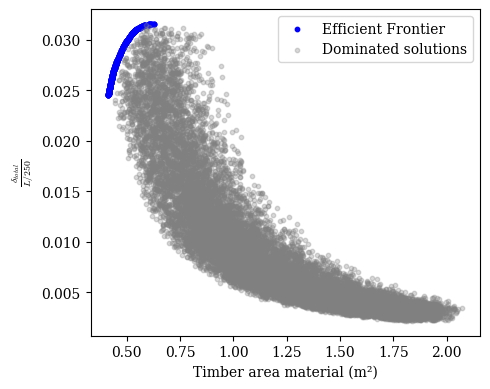

In [12]:
plt.rc('font', family='serif')
plt.figure(figsize=(5, 4))
plt.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [-]"].to_list(), label="Efficient Frontier", color='blue', s=10)
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.3, label="Dominated solutions")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\frac{\delta_{total}}{L/250}$")
plt.legend(loc='upper right',)
plt.tight_layout()
plt.show()

In [ ]:
# df = pd.read_excel("beam_data.xlsx")
# df = df.loc[0]
# p_gk = float(df["p_gk (kN/m²)"])
# p_rodak = float(df["p_rodak (kN)"])
# p_qk = float(df["p_qk (kN/m²)"])
# a = float(df["a (m)"])
# l = float(df["l (cm)"])
# classe_carregamento = df["classe_carregamento"]
# classe_madeira = df["classe_madeira"]
# classe_umidade = df["classe_umidade"]
# f_mk = float(df["resistência característica à flexão longarina (MPa)"])
# f_vk = float(df["resistência característica ao cisalhamento longarina (MPa)"])
# e_modflex = float(df["módulo de elasticidade à flexão longarina (GPa)"])
# f_mktab = float(df["resistência característica à flexão tabuleiro (MPa)"])
# densidade_long = float(df["densidade longarina (kg/m³)"])
# densidade_tab = float(df["densidade tabuleiro (kg/m³)"])
# d = 35.
# esp = 120.0
# bw = 11.0
# h = 30.0

In [ ]:
# samples = np.array([[p_gk, p_rodak, p_qk, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab]])
# params = [a, l, classe_carregamento, classe_madeira, classe_umidade, d, esp, bw, h, "flexao"]
# obj_confia(samples, params)

array([25447.1703073])

In [ ]:
# beta, pf = chamando_form(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flexao")
# beta, pf

(8.146937967052141, 1.8662751537927904e-16)

In [ ]:
# sm, beta, pf = chamando_sampling(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flexao", method="IS")
# beta, pf

(9.262340089798409, 0.0)

In [ ]:
# df = pd.DataFrame(sm.samples)
# df


,0,1,2,3,4,5,6,7,8
0,0.908433,40.332522,3.680689,42.742388,14.344494,17.508690,32.460459,363.624352,321.373159
1,0.815210,42.159989,4.063433,36.991407,17.632885,17.861491,33.477062,412.155191,422.160034
2,0.799264,35.742486,7.442721,43.996842,18.976632,18.566490,27.620866,356.175141,411.276496
3,0.875144,50.918949,5.299062,46.958649,15.474678,16.021081,29.639504,389.668990,374.435713
4,0.914221,40.881068,4.524493,41.806236,17.973795,16.693741,37.473919,351.483560,378.063540
...,...,...,...,...,...,...,...,...,...
99995,0.837711,51.780019,4.148923,44.492855,18.499693,20.023416,32.657034,355.512243,335.119220
99996,0.868688,36.253195,5.017667,38.808164,14.830742,18.018763,29.027935,421.823851,368.467238
99997,0.960407,37.863507,4.515832,41.635987,17.450502,17.170057,32.161794,392.374890,419.369290
99998,0.878409,45.286923,4.494241,41.610034,20.032779,16.836773,33.125313,407.314027,336.596218


In [ ]:
# model = PythonModel(model_script='madeiras.py', model_object_name='obj_confia', params=params)
# rmodel = RunModel(model=model)
# rmodel.run(samples=sm.samples)
# rmodel.qoi_list

[array([21203.81769976]),
 array([17272.92381294]),
 array([19285.47096816]),
 array([22510.04121298]),
 array([19929.09745984]),
 array([21090.62068681]),
 array([22967.84867581]),
 array([26251.66869068]),
 array([21528.63905686]),
 array([17159.31504063]),
 array([19674.10528608]),
 array([19241.28181536]),
 array([20375.92455345]),
 array([19718.07142622]),
 array([21164.91341745]),
 array([20832.03332077]),
 array([19626.85429519]),
 array([24037.15547393]),
 array([22669.94093983]),
 array([16859.53926966]),
 array([21311.49153791]),
 array([21839.39979539]),
 array([14315.10261952]),
 array([20238.98679416]),
 array([26717.86927243]),
 array([19594.3799461]),
 array([20972.57610908]),
 array([23824.57942433]),
 array([19206.29879346]),
 array([23787.50057683]),
 array([23131.15320423]),
 array([16847.45635081]),
 array([19591.38469673]),
 array([23286.6232483]),
 array([18685.26007994]),
 array([22537.113058]),
 array([22527.96765875]),
 array([23221.26413401]),
 array([19971.96

In [ ]:
# samples = np.array([[p_gk, p_rodak, p_qk, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab]])
# paramss = [a, l, classe_carregamento, classe_madeira, classe_umidade, d, esp, bw, h, "flecha"]
# obj_confia(samples, paramss)

array([0.02892324])

In [ ]:
# beta, pf = chamando_form(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flecha")
# beta, pf

ZeroDivisionError: float division by zero

In [ ]:
# sf, beta, pf = chamando_sampling(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flecha", method="IS")
# beta, pf

(9.262340089798409, 0.0)

In [ ]:
# sf.samples

array([[  2.52342535,  40.33252213,   3.68068896, ...,  32.46045932,
        363.62435163, 321.37315897],
       [  2.26447229,  42.15998854,   4.06343262, ...,  33.47706178,
        412.15519087, 422.16003432],
       [  2.22017855,  35.74248629,   7.44272145, ...,  27.62086575,
        356.17514082, 411.27649584],
       ...,
       [  2.66779704,  37.86350724,   4.51583239, ...,  32.16179419,
        392.37488993, 419.36929034],
       [  2.44002475,  45.28692299,   4.49424053, ...,  33.12531311,
        407.31402703, 336.59621776],
       [  2.46884879,  40.33102358,   4.2953076 , ...,  36.80060692,
        347.39322028, 387.22616197]])

In [ ]:
# modelf = PythonModel(model_script='madeiras.py', model_object_name='obj_confia', params=paramss)
# rmodelf = RunModel(model=modelf)
# rmodelf.run(samples=sf.samples)
# rmodelf.qoi_list

[array([0.02839609]),
 array([0.0281402]),
 array([0.02583984]),
 array([0.02628904]),
 array([0.02722235]),
 array([0.02728186]),
 array([0.02839284]),
 array([0.02762287]),
 array([0.02910103]),
 array([0.02846391]),
 array([0.02843869]),
 array([0.02681531]),
 array([0.0290088]),
 array([0.02728188]),
 array([0.02808193]),
 array([0.0285302]),
 array([0.02773661]),
 array([0.02736313]),
 array([0.02898355]),
 array([0.02839042]),
 array([0.02472564]),
 array([0.02594098]),
 array([0.02785667]),
 array([0.02879716]),
 array([0.02734339]),
 array([0.02893233]),
 array([0.02838487]),
 array([0.02851866]),
 array([0.02802299]),
 array([0.02811531]),
 array([0.02886485]),
 array([0.02789539]),
 array([0.02652382]),
 array([0.02597454]),
 array([0.02741641]),
 array([0.02513166]),
 array([0.02752602]),
 array([0.02816286]),
 array([0.02836834]),
 array([0.02792772]),
 array([0.02882565]),
 array([0.02761217]),
 array([0.02822412]),
 array([0.02809841]),
 array([0.02896006]),
 array([0.026

In [ ]:
# import numpy as np

# valores = np.array(rmodelf.qoi_list).flatten()
# quantidade_negativos = np.count_nonzero(valores < 0.0)
# quantidade_negativos

0